# Assignment 03

## Social Network Analysis 

### Steve Elston

## CSCI E-108

## Introduction

In this assignment you will gain some experience with several algorithms used for the analysis of social networks. There are two running examples. The first dataset is a simple purely synthetic network. The second dataset is a widely used example of a small real-world social network.  

Anthropologist [Wayne Zachary (1977)](http://www.communicationcache.com/uploads/1/0/8/8/10887248/an_information_flow_model_for_conflict_and_fission_in_small_groups.pdf) observed the social interactions between members of a small real-world [karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) over a two year period. Toward the end of the study period a conflict arose which caused the club to split into 2. Some club members stayed connect to a group centered on a founder, Mr Hi. Other members started a new club. Zachary published his results in [1977](https://www.jstor.org/stable/3629752).   

> **Required packages:** Before running the code in this notebook you will need to install the [NetworkX package](https://networkx.org/). The NetworkX has a dependency on [PyGraphViz](https://pygraphviz.github.io/). If you have not installed these packages un-comment the code below and install both. Especailly, if you are using the Windows OS, or have instalaiton problems on any OS, read these [PyGraphViz installation instructions](https://pygraphviz.github.io/documentation/stable/install.html) carefully. Finally, you will use the Louvain modularity algorithm from the Python [Community](https://python-louvain.readthedocs.io/en/latest/index.html) package.   

In [1]:
## Install NetworkX if it is not already present.  
#!pip install networkx

## You may need to install PyGraphViz. This instillation will fail on Windows. 
#!pip install pygraphviz

## You may need to install the community package if it is not already present. 
#!pip install community

Execute the code in the cell below to import the packages you will need for this assignment. 

In [2]:
import numpy as np
from scipy.sparse.linalg import eigs
import networkx as nx
import pandas as pd
import itertools
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import modularity, greedy_modularity_communities
import community as community_louvain
import matplotlib.pyplot as plt

%matplotlib inline

## Data Samples

In this assignment you will work with two datasets. The first is a simple synthetic network. The second is the karate club dataset. 

### Instantiate simple network
To create and plot the first dataset execute the code in the cell below. The network is defined by specifying a list of edge tuples. Notice the two clear communities.  

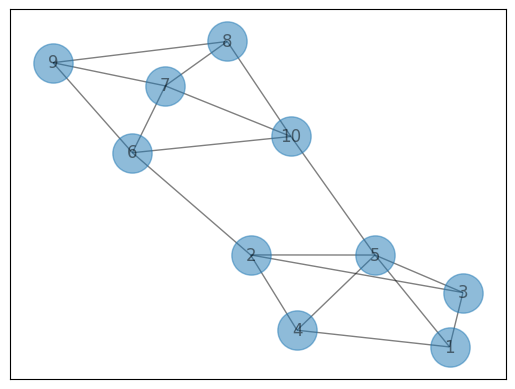

In [3]:
edge_list = [(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(2,6),(3,5),(4,5),(5,10),(6,7),(6,9),(6,10),(7,8),(7,9),(7,10),(8,9),(8,10)]
simple_graph = nx.Graph()
simple_graph.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
simple_graph.add_edges_from(edge_list)

nx.draw_networkx(simple_graph, with_labels=True, alpha=0.5, node_size=800)  

NetworkX uses a memory efficient data structure to store the network and its attributes. To see the instance for this network execute the code in the cell below. 

In [4]:
simple_graph.__dict__

{'graph': {},
 '_node': {1: {},
  2: {},
  3: {},
  4: {},
  5: {},
  6: {},
  7: {},
  8: {},
  9: {},
  10: {}},
 '_adj': {1: {3: {}, 4: {}, 5: {}},
  2: {3: {}, 4: {}, 5: {}, 6: {}},
  3: {1: {}, 2: {}, 5: {}},
  4: {1: {}, 2: {}, 5: {}},
  5: {1: {}, 2: {}, 3: {}, 4: {}, 10: {}},
  6: {2: {}, 7: {}, 9: {}, 10: {}},
  7: {6: {}, 8: {}, 9: {}, 10: {}},
  8: {7: {}, 9: {}, 10: {}},
  9: {6: {}, 7: {}, 8: {}},
  10: {5: {}, 6: {}, 7: {}, 8: {}}},
 '__networkx_cache__': {},
 'degree': DegreeView({1: 3, 2: 4, 3: 3, 4: 3, 5: 5, 6: 4, 7: 4, 8: 3, 9: 3, 10: 4}),
 'edges': EdgeView([(1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (2, 6), (3, 5), (4, 5), (5, 10), (6, 7), (6, 9), (6, 10), (7, 8), (7, 9), (7, 10), (8, 9), (8, 10)]),
 'nodes': NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10))}

Notice the following aspects of the data structure:    
1. The data structure is a dictionary, form of hash table. The network has no top-level attributes, such as a name.  
2. The nodes are referenced by number (no other name has been assigned). The nodes have no attributes attached as yet.
3. The edges are defined by a dictionary referenced by origin node number. The edges are bidirectional, so the representation is symmetric. Each edge is shown twice, with the origin node for each end. The edges have no attributes assigned as yet.
4. The summary of network work characteristics are shown in the 'DegreeView` dictionary, the `EdgeView` list of tuples and the `NodeView' tuple.    

### The karate club network    

To import and plot the karate club dataset execute the code in the cell below. The structure of this social network is fairly complex. However, you can see that some nodes clearly have some amount of centrality. 

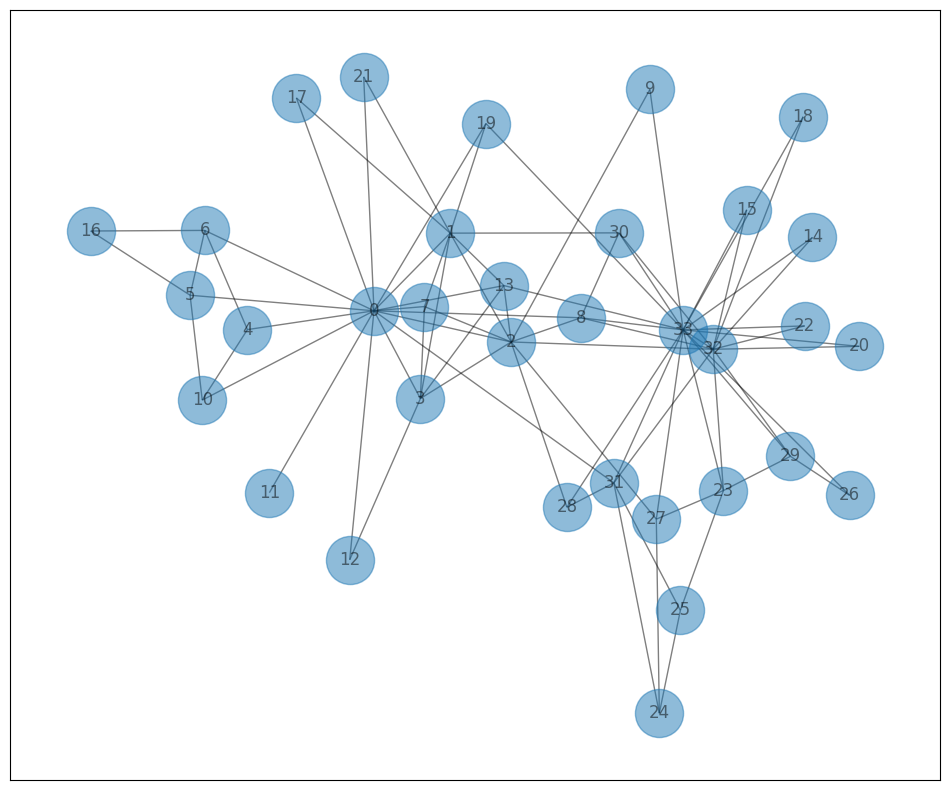

In [5]:
K_club = nx.karate_club_graph()

fig,ax = plt.subplots(figsize=(12,10))
nx.draw_networkx(K_club, with_labels=True, alpha=0.5, node_size=1200, ax=ax)  

Execute the code in the cell below to display the data structure for the karate club network.  

In [6]:
K_club.__dict__

{'graph': {'name': "Zachary's Karate Club"},
 '_node': {0: {'club': 'Mr. Hi'},
  1: {'club': 'Mr. Hi'},
  2: {'club': 'Mr. Hi'},
  3: {'club': 'Mr. Hi'},
  4: {'club': 'Mr. Hi'},
  5: {'club': 'Mr. Hi'},
  6: {'club': 'Mr. Hi'},
  7: {'club': 'Mr. Hi'},
  8: {'club': 'Mr. Hi'},
  9: {'club': 'Officer'},
  10: {'club': 'Mr. Hi'},
  11: {'club': 'Mr. Hi'},
  12: {'club': 'Mr. Hi'},
  13: {'club': 'Mr. Hi'},
  14: {'club': 'Officer'},
  15: {'club': 'Officer'},
  16: {'club': 'Mr. Hi'},
  17: {'club': 'Mr. Hi'},
  18: {'club': 'Officer'},
  19: {'club': 'Mr. Hi'},
  20: {'club': 'Officer'},
  21: {'club': 'Mr. Hi'},
  22: {'club': 'Officer'},
  23: {'club': 'Officer'},
  24: {'club': 'Officer'},
  25: {'club': 'Officer'},
  26: {'club': 'Officer'},
  27: {'club': 'Officer'},
  28: {'club': 'Officer'},
  29: {'club': 'Officer'},
  30: {'club': 'Officer'},
  31: {'club': 'Officer'},
  32: {'club': 'Officer'},
  33: {'club': 'Officer'}},
 '_adj': {0: {1: {'weight': 4},
   2: {'weight': 5},
 

In [7]:
for (node1, node2) in K_club.edges:
    print(str(node2))

1
2
3
4
5
6
7
8
10
11
12
13
17
19
21
31
2
3
7
13
17
19
21
30
3
7
8
9
13
27
28
32
7
12
13
6
10
6
10
16
16
30
32
33
33
33
32
33
32
33
32
33
33
32
33
32
33
25
27
29
32
33
25
27
31
31
29
33
33
31
33
32
33
32
33
32
33
33


This data structure has the same organization as the first network. Notice that this network has attributes has some attributes set. The club joined is an attribute of the nodes and the edges have weights representing a measure of affinity between the nodes.    

We can add other attributes to the nodes and edges of this network. Execute the code in the cell below to set a distance attribute as the inverse of the edge weight. 

In [8]:
edge_distances = {}
for (node1,node2) in K_club.edges:
    dist = round(1.0/K_club.get_edge_data(node1,node2)['weight'], 3)
    edge_distances[node1,node2] = dist
    edge_distances[node2,node1] = dist

nx.set_edge_attributes(K_club, edge_distances, 'distance')
K_club.__dict__

{'graph': {'name': "Zachary's Karate Club"},
 '_node': {0: {'club': 'Mr. Hi'},
  1: {'club': 'Mr. Hi'},
  2: {'club': 'Mr. Hi'},
  3: {'club': 'Mr. Hi'},
  4: {'club': 'Mr. Hi'},
  5: {'club': 'Mr. Hi'},
  6: {'club': 'Mr. Hi'},
  7: {'club': 'Mr. Hi'},
  8: {'club': 'Mr. Hi'},
  9: {'club': 'Officer'},
  10: {'club': 'Mr. Hi'},
  11: {'club': 'Mr. Hi'},
  12: {'club': 'Mr. Hi'},
  13: {'club': 'Mr. Hi'},
  14: {'club': 'Officer'},
  15: {'club': 'Officer'},
  16: {'club': 'Mr. Hi'},
  17: {'club': 'Mr. Hi'},
  18: {'club': 'Officer'},
  19: {'club': 'Mr. Hi'},
  20: {'club': 'Officer'},
  21: {'club': 'Mr. Hi'},
  22: {'club': 'Officer'},
  23: {'club': 'Officer'},
  24: {'club': 'Officer'},
  25: {'club': 'Officer'},
  26: {'club': 'Officer'},
  27: {'club': 'Officer'},
  28: {'club': 'Officer'},
  29: {'club': 'Officer'},
  30: {'club': 'Officer'},
  31: {'club': 'Officer'},
  32: {'club': 'Officer'},
  33: {'club': 'Officer'}},
 '_adj': {0: {1: {'weight': 4, 'distance': 0.25},
   2

 The edges now have both a weight and distance attribute.  

## Exploring the Networks

As a first step, let's explore some of the basic properties of these networks. As a first step, execute the code in the cell below to expand the compact NetworkX data structure.  

In [9]:
simple_graph_array = nx.to_numpy_array(simple_graph) 
print(simple_graph_array)

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]]


The network is now represented by a dense **association matrix**. There is a $1$ representing each edge, and a $0$ where there is no edge between the nodes.     

Next, you can quantify some characteristics of the network by performing simple operations on the association matrix.   
1. The row of column indices indicate the node.    
2. The **out degree** is the sum across the row of the association matrix.  
3. The **in degree** is the sum across the columns of the association matrix.
4. The sparsity of the network compares the fraction of edges present vs. the number of edges in a fully connected graph. For a graph with $n$ nodes and $e$ edges we can measure sparsity,
   $$s = 1- \frac{e}{n^2}$$

Execute the code and examine the results.

In [10]:
out_degree = np.sum(simple_graph_array, axis=0).astype(int)
in_degree = np.sum(simple_graph_array, axis=1).astype(int)
n_nodes = len(simple_graph_array)
sparsity = 1- np.sum(simple_graph_array)/n_nodes**2
print(f'The number of nodes: {n_nodes} and sparsity: {sparsity}')
print(f'{pd.DataFrame({'In degree': in_degree, 'Out degree': out_degree}, index=range(1,n_nodes + 1))}')

The number of nodes: 10 and sparsity: 0.64
    In degree  Out degree
1           3           3
2           4           4
3           3           3
4           3           3
5           5           5
6           4           4
7           4           4
8           3           3
9           3           3
10          4           4


> **Exercise 3-01:** You will now analyze the karate club network by doing the following:
> 1. Instantiate the association matrix from the NetworkX data structure using the [NetworkX to_numpy_array](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.to_numpy_array.html) function. The edges have weights, so you will need to use [numpy.where](https://numpy.org/doc/2.2/reference/generated/numpy.where.html) to convert the weighted association matrix to $[0,1]$ values. Name this array, 'K_club_array' You do not need to print this array.
> 2. Display the number of nodes and sparsity of this network.
> 3. Compute and display the in degree and out degree of each node in the network.   

In [11]:
## Put your code below



print(f'The number of nodes: {n_nodes} and sparsity: {sparsity}')
print(f'{pd.DataFrame({'In degree': in_degree, 'Out degree': out_degree}, index=range(n_nodes)).sort_values(by="In degree")}')

The number of nodes: 34 and sparsity: 0.8650519031141868
    In degree  Out degree
11          1           1
16          2           2
26          2           2
22          2           2
21          2           2
20          2           2
18          2           2
17          2           2
14          2           2
12          2           2
15          2           2
9           2           2
19          3           3
4           3           3
10          3           3
28          3           3
24          3           3
25          3           3
7           4           4
30          4           4
29          4           4
6           4           4
5           4           4
27          4           4
8           5           5
13          5           5
23          5           5
3           6           6
31          6           6
1           9           9
2          10          10
32         12          12
0          16          16
33         17          17


> Examine the results of your calculations and answer the following questions:
> 1. Compare the NetworkX data structure to the association matrix representation of the network. Which representation uses less memory and why?
> 2. Notice that the in degree is identical to the out degree for each node. Is this expected and why?
> 3. Based only on degree, which two nodes to you expect to have highest centrality?
> 4. Compare the sparsity of the karate club network to the simple network. What does this difference tell you about these networks.   

> **Answers:**
> 1.     
> 2.      
> 3.     
> 4.     

## Random Graphs

[Random graphs](https://en.wikipedia.org/wiki/Random_graph) are often used as a basis for comparison with real world networks. The idea is simple. We construct a graph with $n$ nodes and randomly allocated edges. There are two possible models.    
1. $𝐺(𝑛,𝑀)$: Where $𝑀$ edges are randomly distributed connecting the $𝑛$ nodes.
2. $𝐺(𝑛,𝑝$): Where the probability of an edge connecting two nodes is $𝑝$. 

Here we will only work with the first model. Execute the code in the cell below to generate and plot random graphs with a fixed $n=12$ and varibale $M$. 

>Note: If the code throws a disconnected graph exception on the first try, run the code again. You may need several atempts before the code executes.  

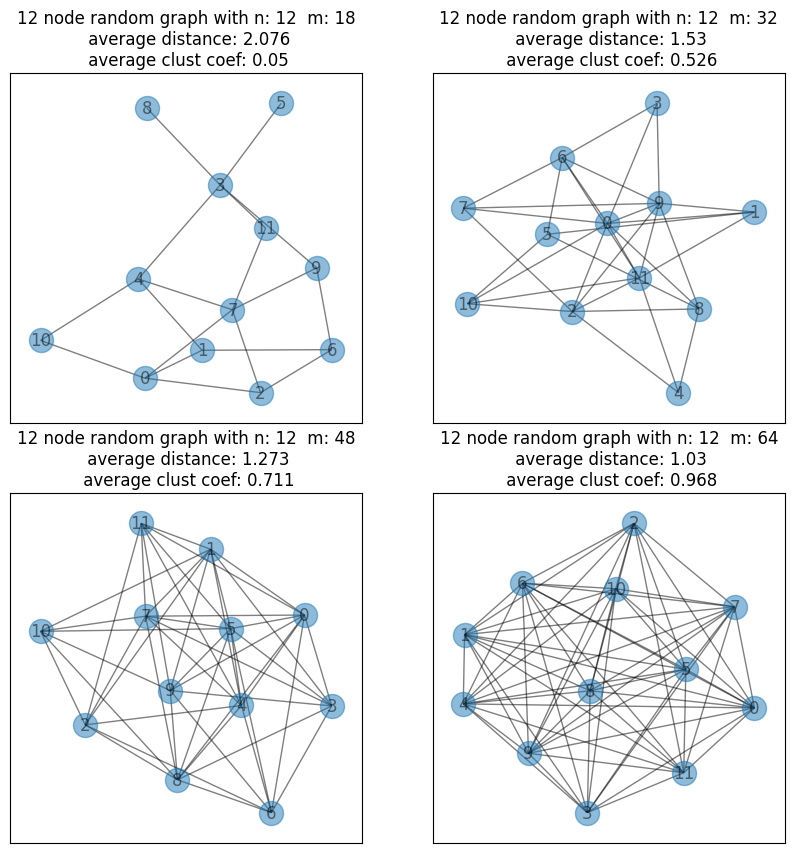

In [12]:
_,ax_p = plt.subplots(2,2, figsize =(10,10))
ax_p = ax_p.flatten()

n=12
np.random.seed(498)
for ax, m in zip(ax_p, [18, 32, 48, 64]): 
    
    random_graph = nx.gnm_random_graph(n, m) 
    random_average_dist = round(nx.average_shortest_path_length(random_graph), 3)
    random_average_clust_coef = round(nx.average_clustering(random_graph), 3)

    nx.draw_networkx(random_graph, alpha=0.5, ax=ax)
    ax.set_title(f"{n} node random graph with n: {n}  m: {m}\n average distance: {random_average_dist}\n average clust coef: {random_average_clust_coef}")

> **Exercise 3-02:** Examine these random graphs. Keeping in mind that a fully connected graphs with 12 nodes has $\frac{n(n-1)}{2} = \frac{12 \times 11}{2} = 64$ edges, answer the following questions:
> 1. Explain how the average distance in the random graph changes as the number of edges approaches a fully connected graph.
> 2. For the graphs the number of edges $m \ll 64$ do you think the random graphs shown are the only possibility and why?  

> **Answers:**
> 1.       
> 2.            

## Measures of Centrality

You will now compute and assess measures of centrality for both graphs. The goal is to find the nodes with the greatest influence measured by centrality.   

### Closeness Centrality

Closeness centrality is a simple centrality metric. Nodes with a small average inverse distance to the other nodes in the network are considered to have higher centrality.  

Execute the code in the cell below to compute and display the closeness centrality of the simple graph. This code uses the [networkx.algorithms.centrality.closeness_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html?highlight=closeness%20centrality) function.   

In [13]:
def print_centrality_from_dictionary(dict): 
    print(pd.Series(dict).sort_values(ascending=False))

simple_closeness_centrality = nx.closeness_centrality(simple_graph)
print_centrality_from_dictionary(simple_closeness_centrality)

5     0.642857
10    0.642857
2     0.600000
6     0.600000
7     0.529412
3     0.500000
4     0.500000
8     0.473684
1     0.450000
9     0.450000
dtype: float64


A graphical display of centrality metrics of a graph is often very useful in terms of interpreting the results. Execute the code in the cell below to display the closeness centrality of the simple graph. 

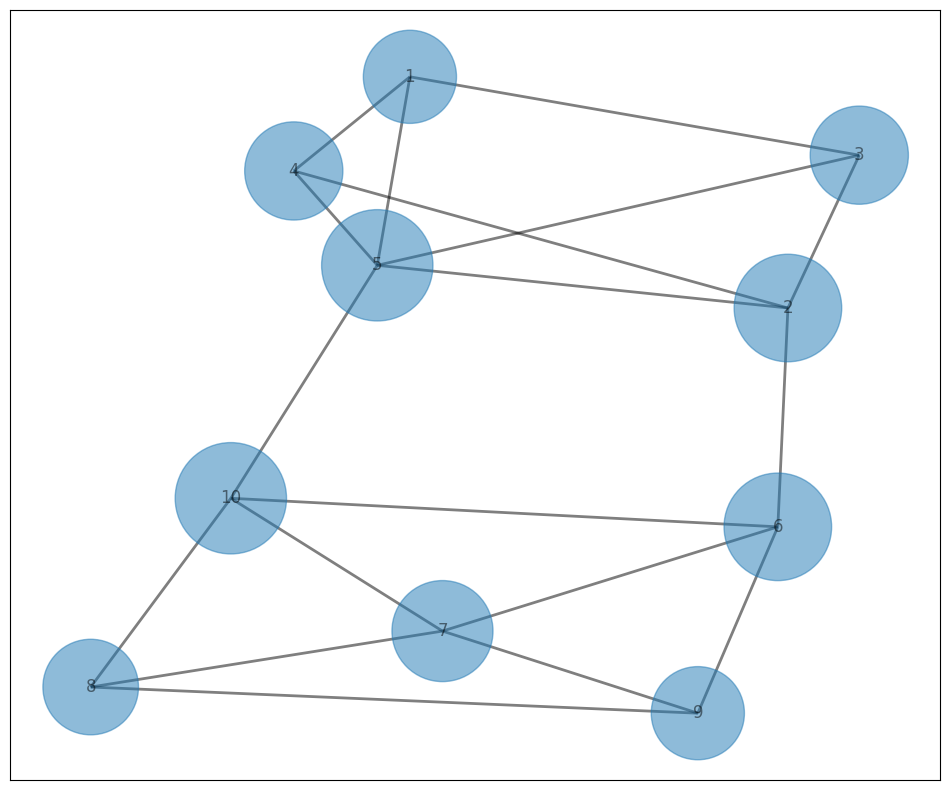

In [14]:
def plot_centrality(G, node_centrality=None, edge_centrality=None, size=1.0, width=2.0): 
    fig,ax = plt.subplots(figsize=(12,10))
    ## Set the node sizes to display if provided
    if node_centrality==None:
        node_size=size
    else: 
        node_size = [size*node_centrality[key] for key in node_centrality.keys()]
    ## Set the edge width to display if provided 
    if edge_centrality==None:
        edge_width=width
    else:
        edge_width = [width*edge_centrality[u,v] for u,v in edge_centrality.keys()]
    ## Display the graph
    nx.draw_networkx(G, with_labels=True, alpha=0.5, node_size=node_size, width=edge_width, ax=ax)  

plot_centrality(simple_graph, simple_closeness_centrality, size=10000, width=2)

There range of the closeness centrality values is limited. None the less, the results look reasonable since the nodes with the highest closeness centrality are concentrated around the middle of the graph, and more peripheral nodes have low closeness centrality. 

> **Exercise 3-03:** You will now compute and display the closeness centrality of the karate club graph by the following steps:   
> 1. Compute the closeness centrality of the graph using the [networkx.algorithms.centrality.closeness_centrality](https://networkx.org/documentation/stable/search.html?q=closeness) function.  
> 2. Plot the closeness centrality of the graph using the `plot_centrality` function with the `size=1000` argument.  
> 3. Print the centrality of the graph nodes using the `print_centrality_from_dictionary` function. 

0     0.568966
2     0.559322
33    0.550000
31    0.540984
13    0.515625
32    0.515625
8     0.515625
19    0.500000
1     0.485294
3     0.464789
30    0.458333
27    0.458333
28    0.452055
7     0.440000
9     0.434211
23    0.392857
29    0.383721
6     0.383721
5     0.383721
10    0.379310
4     0.379310
25    0.375000
24    0.375000
17    0.375000
21    0.375000
22    0.370787
20    0.370787
15    0.370787
14    0.370787
12    0.370787
18    0.370787
11    0.366667
26    0.362637
16    0.284483
dtype: float64


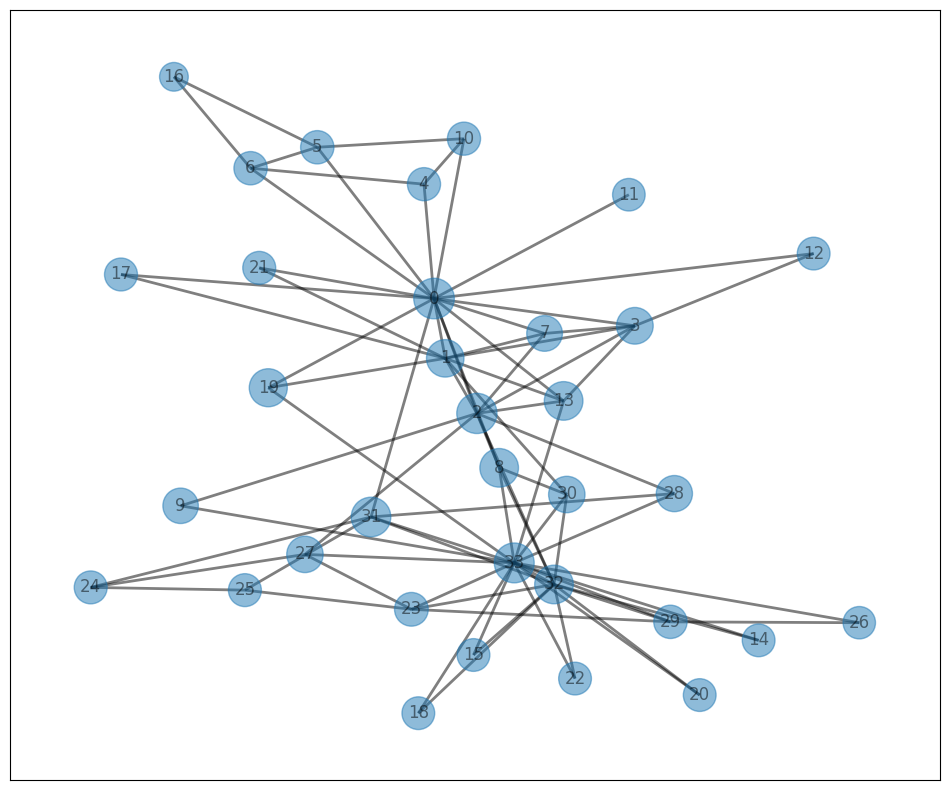

In [15]:
## Put your code below




> 4. Next, compute the closeness centrality of the graph using the [networkx.algorithms.centrality.closeness_centrality](https://networkx.org/documentation/stable/search.html?q=closeness) function, setting the `distance='distance'` argument.  
> 5. Plot the closeness centrality of the graph using the `plot_centrality` function with the `size=1000` argument.  
> 6. Print the centrality of the graph nodes using the `print_centrality_from_dictionary` function. 

2     1.634553
33    1.610778
8     1.592587
0     1.538605
13    1.530399
1     1.492807
31    1.463544
32    1.457662
27    1.322857
23    1.287554
30    1.262143
3     1.257478
25    1.255612
7     1.221227
15    1.176387
28    1.113999
29    1.110700
5     1.082961
6     1.081754
22    1.063007
4     1.055257
11    1.027909
14    0.997069
20    0.991140
24    0.954502
26    0.944395
19    0.932862
21    0.926810
10    0.925718
18    0.904432
9     0.904432
12    0.894333
17    0.881222
16    0.809578
dtype: float64


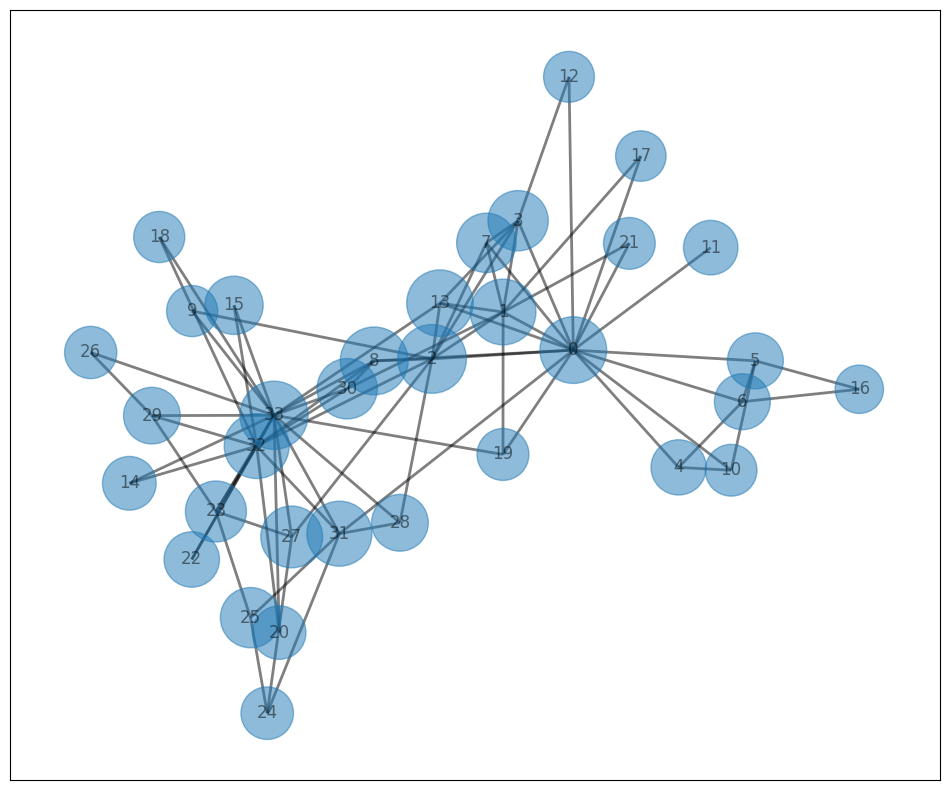

In [16]:
## Put your code below




> Examine the results of the two models and answer the following questions.  
> 1. What difference does weighting make in the closeness graph and why do these differences arise?     
> 2. Examine both the numerical values of closeness centrality and the plot. What statement can you make about how well the closeness centrality represents the connectedness of the network for both unweighted and weighted cases?     
> **End of exercise.**

> **Answers:**
> 1.                  
> 2.          

### K-Cores

K-cores are a metric of connection density at the densest part of a community, the core. A node, $n_i$, is in the k-core if at least $k$ edges can be removed without breaking the component containing the node into parts. At the minimum, a k-core node must have at least $degree(n_i) = k_i > k$.

The [networkx.k_componentse](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.connectivity.kcomponents.k_components.html) function iterates over values of k. The function starts from $k=1$ and terminates at the value of $k$ where all nodes are in disconnected components. To see how the core components evolved for the simple example graph execute the code in the cell below.   

In [17]:
nx.k_components(simple_graph)

{3: [{1, 2, 3, 4, 5}, {6, 7, 8, 9, 10}],
 2: [{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}],
 1: [{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]}

The key of the displayed dictionary is the value of k. The values are the components for that value of k. At $k=3$ there are 2 disconnected components, defined by the two dictionaries.

To visualize the cores at the different values of k execute the code in the cell below.  

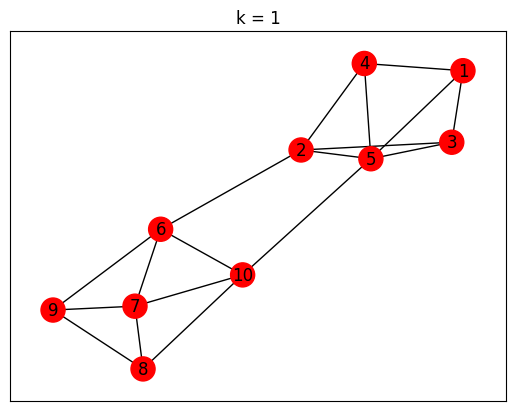

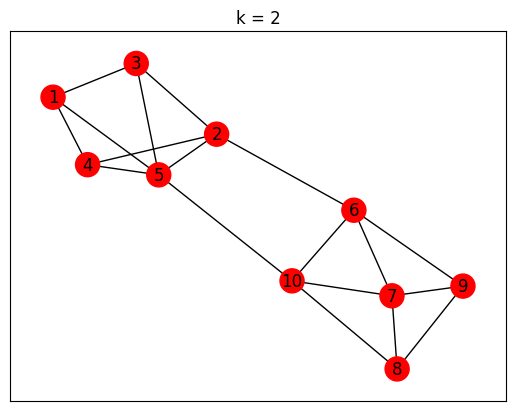

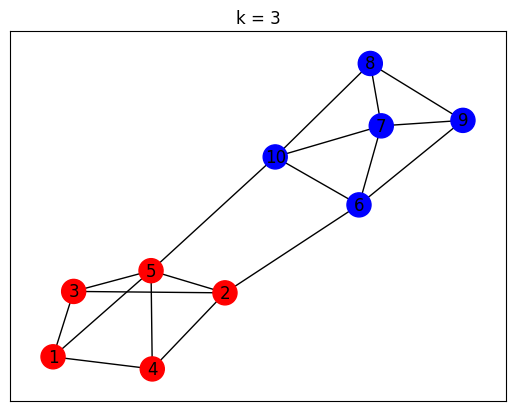

In [18]:
def plot_k_components(G, K_comps):
    for c in range(len(K_comps)): #[4,3,2,1]:
        node_colors = ['blue']*len(G.nodes)
        for node in K_comps[c+1][0]: 
            node_colors[node-1] = 'red'
        nx.draw_networkx(G, node_color=node_colors, with_labels=True)
        plt.title('k = ' + str(c+1))
        plt.show()
        
K_comps = nx.k_components(simple_graph)
plot_k_components(simple_graph, K_comps)

Notice that for $k=3$ the simple graph is divided into two components. Given the structure of the communities, the selection of k-core nodes is a bit arbitrary. At termination, the algorithm must label nodes as core or not, and in this case, there is no particularly good division of the nodes.      

> **Exercise 3-04:** To visualize the k-cores of the karate club graph execute the code in the cell below to display these cores for different values of k. Hint: It will help your interpretation to examine printed degree of the nodes in this, which is the [degree](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html?highlight=degree#networkx.Graph.degree) attribute of the graph object. 

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


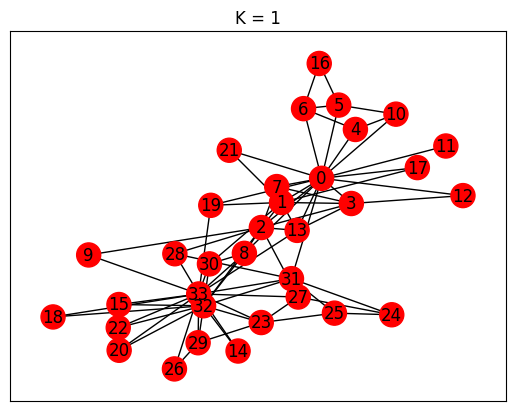

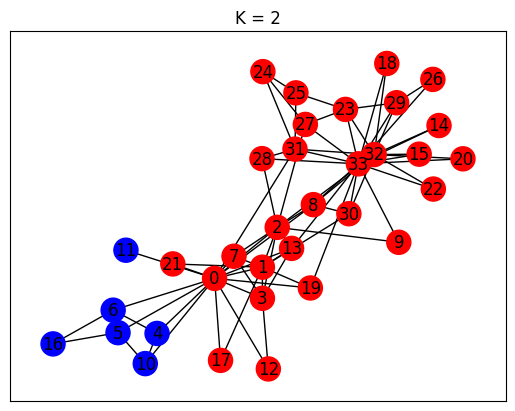

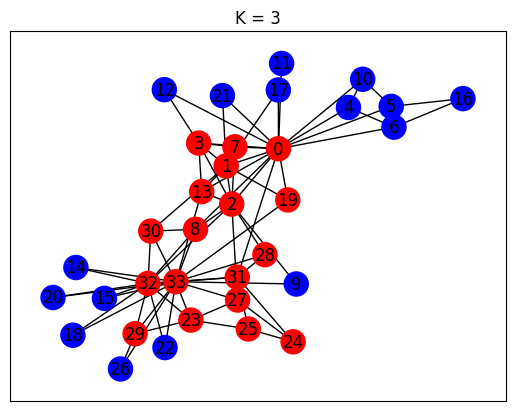

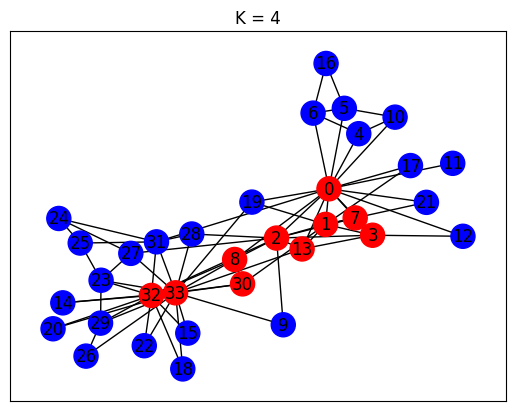

In [19]:
def plot_k_components_0_index(G, K_comps):
    for c in range(len(K_comps)): #[4,3,2,1]:
        node_colors = ['blue']*len(G.nodes)
        for node in K_comps[c+1][0]: 
            node_colors[node] = 'red'
        nx.draw_networkx(G, node_color=node_colors, with_labels=True)
        plt.title('K = ' + str(c+1))
        plt.show()

print(K_club.degree)
K_comps = nx.k_components(K_club)
plot_k_components_0_index(K_club, K_comps)

> Examine these plots and provide short answers to the following questions:      
> 1. How do the members of the core nodes change with increasing k as related to centrality?      
> 2. How does membership in the k-core align with connectivity and centrality of the graph?        
> **End of exercise.**

> **Answers:**     
> 1.              
> 2.      

### Triangle Centrality and Clustering  

The density of triangles, or triad relationships, in a social network is a measure of the centrality of the nodes. Triangle density is computed using the [networkx.algorithms.cluster.triangles](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.triangles.html?highlight=triangle#networkx.algorithms.cluster.triangles) function. To see the triangle density of the simple graph example execute the code in the cell below.        

{1: 2, 2: 2, 3: 2, 4: 2, 5: 4, 6: 2, 7: 4, 8: 2, 9: 2, 10: 2}

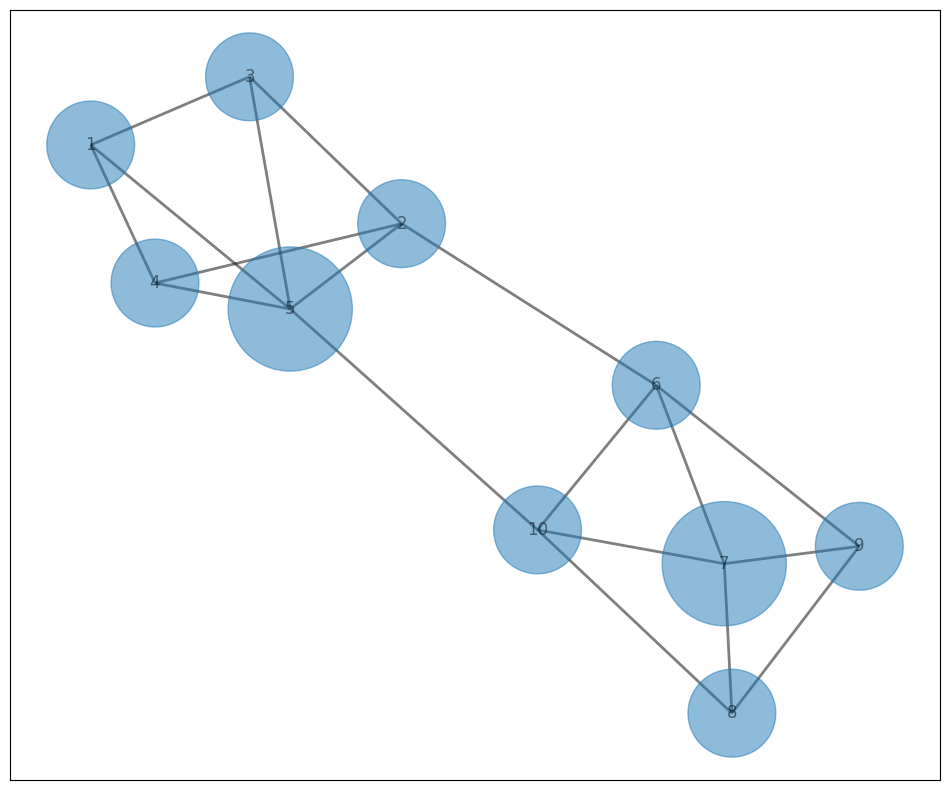

In [20]:
## Compute triangle density  
triangles = nx.triangles(simple_graph)
plot_centrality(simple_graph, triangles, size=2000, width=2)
triangles

In the above plot you can see that two nodes have higher triangle density that the others. These nodes are vertices of 4 triangles, indicating centrality of these nodes.

Triangle centrality is a biased measure since nodes with higher degree are more likely to be vertices of a triad in a random graph. The clustering coefficient adjusts the triangle density of the nodes by the degree, which is done by the [networkx.algorithms.cluster.clustering](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html?highlight=clustering#networkx.algorithms.cluster.clustering) function. Execute the code to display the correlation coefficients for the simple graph. 

1     0.666667
3     0.666667
4     0.666667
7     0.666667
8     0.666667
9     0.666667
5     0.400000
2     0.333333
6     0.333333
10    0.333333
dtype: float64


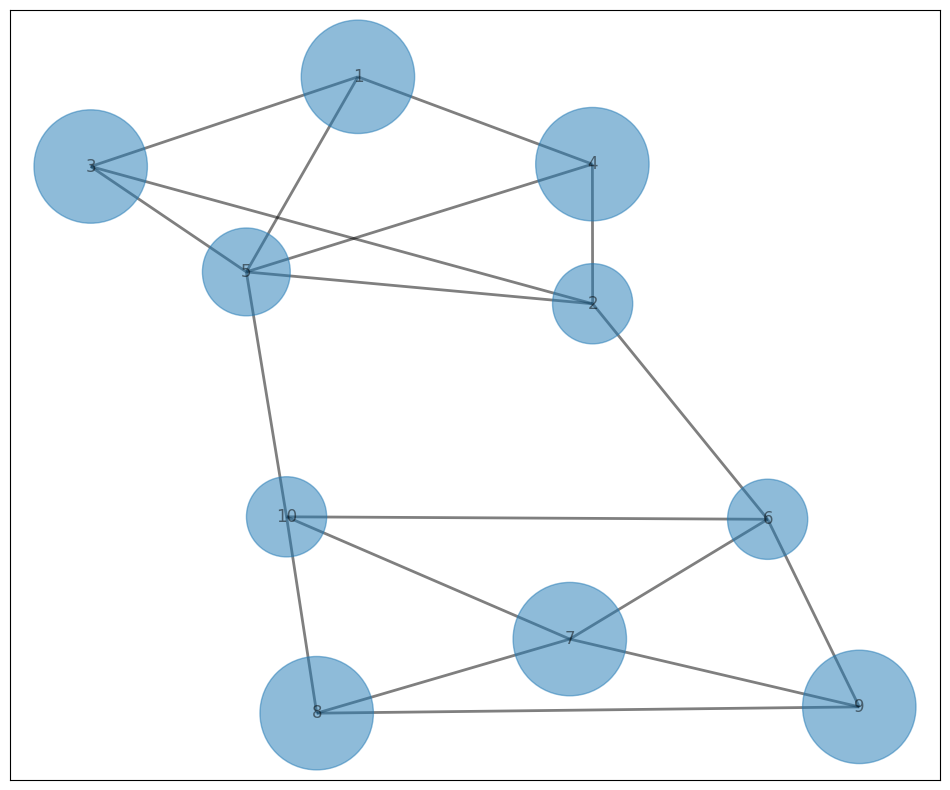

In [21]:
clustering = nx.clustering(simple_graph)
plot_centrality(simple_graph, clustering, size=10000, width=2)
print_centrality_from_dictionary(clustering)

There are several nodes with high clustering coefficients. Because of the small graph with significant symmetry several nodes have high clustering coefficients.    

> **Exercise 3-05:** Compute and display the triangle density for the karate club graph. Print the triangle density using the `print_centrality_from_dictionary` function and the plot. 

0     18
33    15
32    13
1     12
2     11
3     10
7      6
13     6
8      5
23     4
29     4
30     3
31     3
6      3
5      3
10     2
4      2
28     1
27     1
26     1
25     1
24     1
18     1
22     1
21     1
20     1
19     1
16     1
15     1
14     1
12     1
17     1
11     0
9      0
dtype: int64


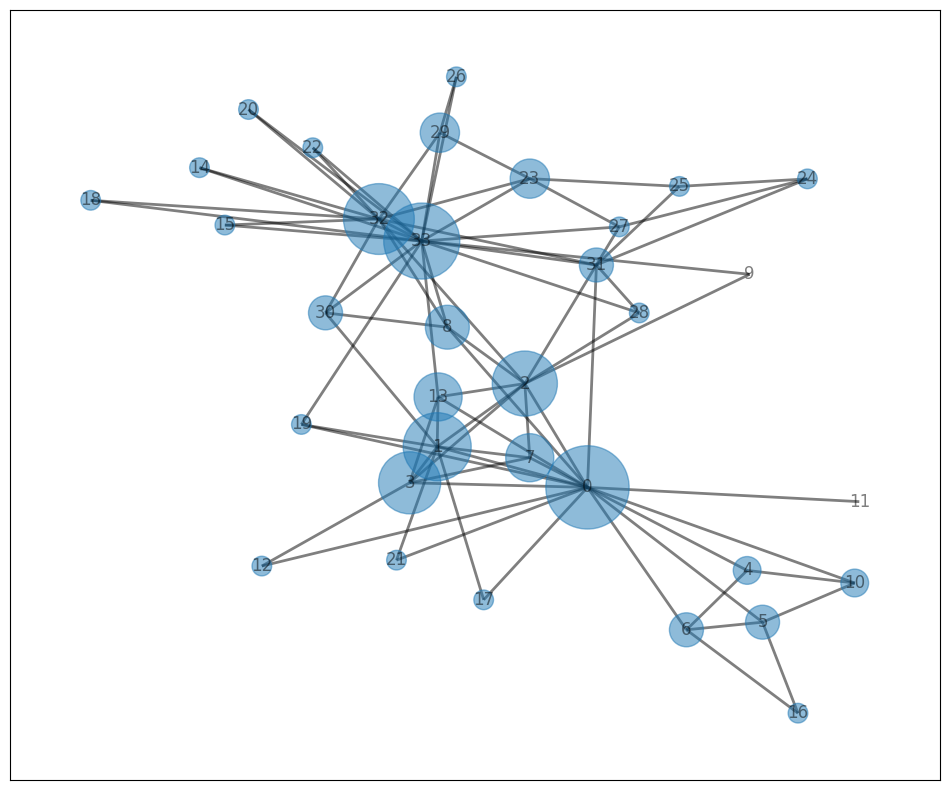

In [22]:
## Put your code below  





> Examine the triangle density of this graph. How do the nodes with high triangle density compare to the $k=$ core components found in Exercise 3-04?       
> **End of exercise.**     

> **Answer:**      

> **Exercise 3-06:** In the cell below create and execute the code to print the clustering coefficients of the karate club graph using the `print_centrality_from_dictionary` function and display the plot.   

15    0.559267
16    0.508128
7     0.485672
22    0.443890
14    0.443890
26    0.359977
21    0.359977
20    0.352316
18    0.307776
13    0.307287
29    0.303313
3     0.300001
12    0.297155
17    0.285714
10    0.249594
4     0.249594
8     0.242972
30    0.234734
5     0.231774
6     0.231774
23    0.220585
1     0.166915
24    0.144599
25    0.144599
2     0.131427
19    0.119992
28    0.119992
32    0.096568
27    0.095238
31    0.093955
0     0.066311
33    0.052330
11    0.000000
9     0.000000
dtype: float64


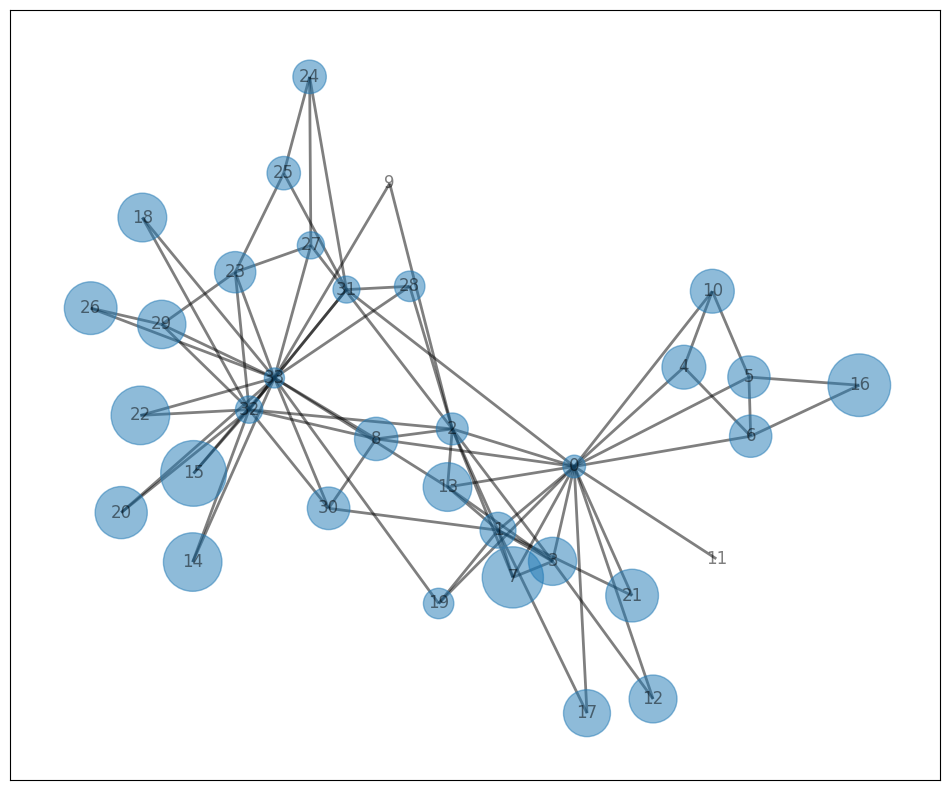

In [23]:
## Put your code below





> Examine the results and answer these questions.
> 1. Notice how the clustering coefficient is down-weighted by the degree of the node. What pattern can you observe for the nodes with the highest and lowest clustering coefficients?
> 2. Compare the results of the clustering coefficient analysis to the triangle density of the nodes. In one or a few sentences, explain these differences.   
> **End of exercise**

> **Answers:**
> 1.           
> 2.             

## Betweenness 

Betweenness is a measure of the number of shortest paths through a node or edge. Nodes and edges with high betweenness tend to be at the edges of communities within a graph. The node and edge betweenness often follow similar patterns, these different metrics can sometimes highlight different aspects of community structure.   

We use betweenness in two ways here. First to highlight community structure in the graph. The nodes and edges connecting communities tend to have the highest betweenness since there are relatively fewer paths between densely connected communities. Next, we will use the concept of betweenness to remove edges from graphs and partition them by communities.     

### Betweenness Centrality  

We can use the concept of either edge or node betweenness as a measure of centrality. Nodes and edges with high betweenness can define the edges of communities. The code in the cells below computes the edge betweenness with the [networkx.algorithms.centrality.edge_betweenness_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html?highlight=betweenness#networkx.algorithms.centrality.edge_betweenness_centrality) function and the node betweenness with the [networkx.algorithms.centrality.betweenness_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html?highlight=betweenness#networkx.algorithms.centrality.betweenness_centrality). Execute this code and examine the results. 

In [24]:
edge_betweenness=nx.edge_betweenness_centrality(simple_graph)
print_centrality_from_dictionary(edge_betweenness)

5  10    0.305556
2  6     0.250000
8  10    0.146296
6  9     0.135185
1  5     0.122222
7  10    0.105556
2  3     0.101852
   4     0.101852
3  5     0.085185
4  5     0.085185
6  7     0.079630
   10    0.079630
2  5     0.072222
8  9     0.051852
1  4     0.046296
   3     0.046296
7  9     0.038889
   8     0.035185
dtype: float64


In [25]:
node_betweenness = nx.betweenness_centrality(simple_graph)
print_centrality_from_dictionary(node_betweenness)

5     0.293981
10    0.273148
6     0.215278
2     0.203704
7     0.037037
3     0.020833
4     0.020833
8     0.020833
9     0.016204
1     0.009259
dtype: float64


Next, execute the code in the cell below to display a plot of the simple graph with node size showing betweenness centrality and edge width showing edge centrality. 

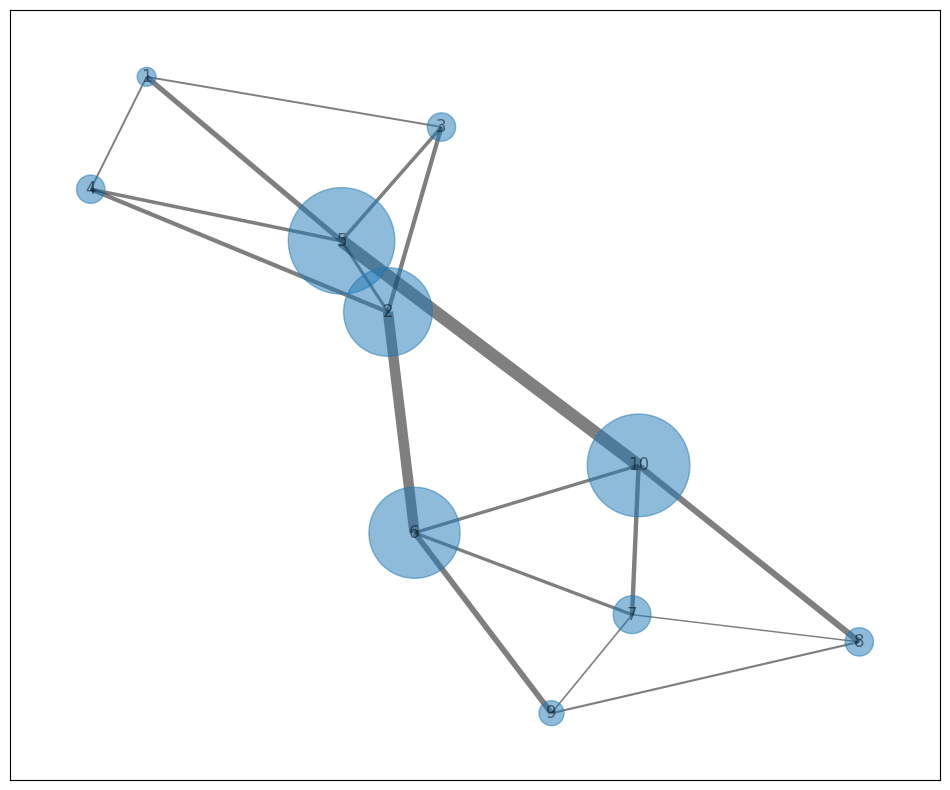

In [26]:
plot_centrality(simple_graph, node_betweenness, edge_betweenness, size=20000, width=30)

Notice the following aspects of the node and edge betweenness for this graph. The nodes with the highest betweenness are the ones with end points for edges between the communities. Correspondingly, the edges between the communities have the highest betweenness.  

> **Exercise 3-07:** Starting with the karate club graph create and execute code in the cell below do the following:   
> 1. Compute the edge betweenness. 
> 2. Compute and print the node betweenness centrality using the `print_centrality_from_dictionary` function. 
> 3. Plot the graph showing edge betweenness and betweenness centrality. 

0     0.437635
33    0.304075
32    0.145247
2     0.143657
31    0.138276
8     0.055927
1     0.053937
13    0.045863
19    0.032475
5     0.029987
6     0.029987
27    0.022333
23    0.017614
30    0.014412
3     0.011909
25    0.003840
29    0.002922
24    0.002210
28    0.001795
9     0.000848
10    0.000631
4     0.000631
26    0.000000
18    0.000000
22    0.000000
21    0.000000
20    0.000000
16    0.000000
15    0.000000
14    0.000000
12    0.000000
11    0.000000
7     0.000000
17    0.000000
dtype: float64


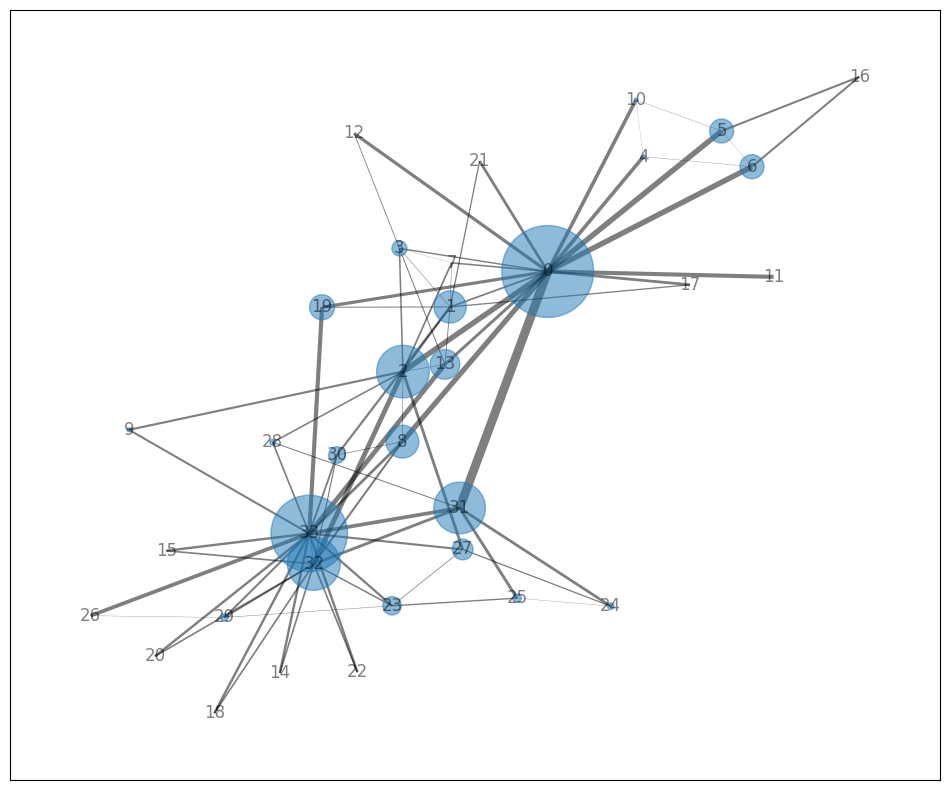

In [27]:
## Put your code below





> 4. Compute the edge betweenness with the edge weights using the `weight='weight'` argument. 
> 5. Compute and print using the `print_centrality_from_dictionary` function the node betweenness centralitywith the edge weights using the `weight='weight'` argument. 
> 6. Plot the graph showing edge betweenness and betweenness centrality. 

0     0.473769
33    0.396780
19    0.240657
31    0.125631
32    0.072222
2     0.069413
24    0.064078
1     0.064015
17    0.030492
5     0.029356
6     0.029356
8     0.024811
28    0.019129
9     0.013794
27    0.012311
30    0.005682
18    0.005682
3     0.002525
13    0.002273
23    0.001894
25    0.000947
4     0.000947
10    0.000947
14    0.000000
11    0.000000
12    0.000000
29    0.000000
16    0.000000
26    0.000000
15    0.000000
22    0.000000
20    0.000000
7     0.000000
21    0.000000
dtype: float64



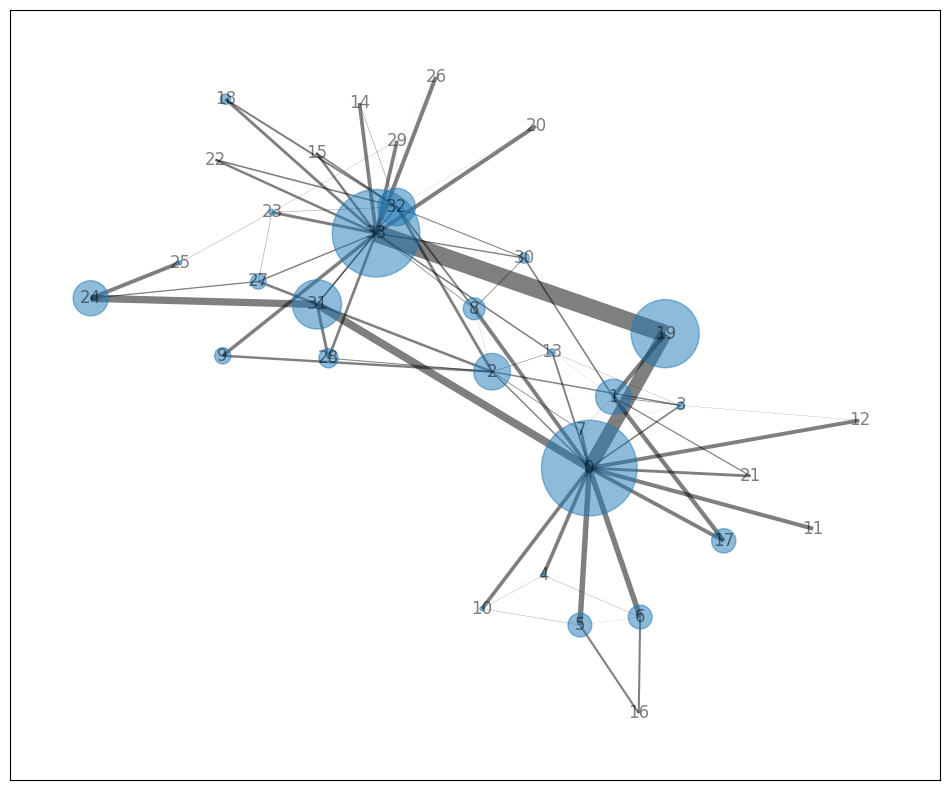

In [28]:
## Put your code below





> Examine this plot, keeping in mind that this network has weighted edges, answer the following questions: 
> 1. Compare the node betweenness centrality for the unweighted network to the nodes in the $k=4$ k-core. Do nodes with high betweenness centrality appear to be largely the same ones in the k-core?   
> 2. Certain edges have relatively high betweenness in the unweighted graph. Can you see a correspondence between these edges and a possible division of the graph into communities?       
> 3. Notice how the edge weighting changes the order of node betweenness. In a one or a few sentences, explain how the change in edge betweenness between these graphs account for this change?                     
> **End of exercise.** 

> **Answers:**    
> 1.    
> 2.          
> 3.         

### Graph Partitioning with Betweenness 

Having explored the betweenness of the two running example graphs, we will now turn our attention to using betweenness to partition these graphs. Since the goal is to partition the graphs by removing edges, we will use edge betweenness. 

The Girvan Newman algorithm is a well known method for partitioning graphs into communities using edge betweenness. The algorithm partitions the graph by recursively removing edges with the highest betweenness. Execute the code which uses [networkx.algorithms.community.centrality.girvan_newman](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html?highlight=girvan%20newman#networkx.algorithms.community.centrality.girvan_newman) the function, and examine the results.  

In [29]:
betweenness_decomp = girvan_newman(simple_graph)
betweenness_decomp = tuple(sorted(c) for c in next(betweenness_decomp))
betweenness_decomp

([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])

The Givan Newman algorithm has partitioned the graph into two subsets. These subsets correspond to the communities.    

Execute the code in the cell below to see the graph partitioned by these communities. 

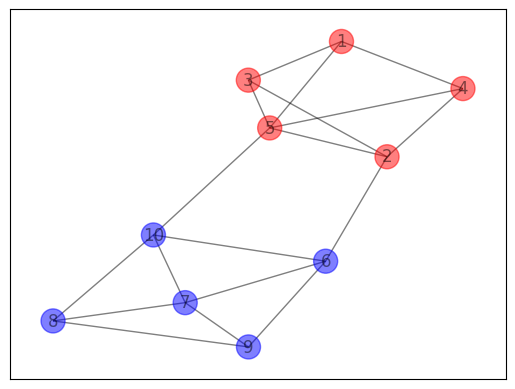

In [30]:
col = ['red','blue']
node_colors = ['None']*len(simple_graph.nodes)
for i,list in enumerate(betweenness_decomp): 
    for val in betweenness_decomp[i]:
        node_colors[val-1] = col[i] 
 
nx.draw_networkx(simple_graph, with_labels=True, alpha=0.5, node_color=node_colors)  

The figure above shows the communities are labeled as as expected.   

We can take a direct approach to partitioning a graph using edge betweenness. The code in the cell below does just this using a greedy algorithm with the following steps:  
1. The function `remove_edges` prunes the k edges with the highest edge betweenness. In the for loop the betweenness of the current graph is computed. It is important to update the edge betweenness values each time an edge is removed, since the graph changes at each step.     
2. The edge to removed is determined by the `find_max_edge` function. This function searches the edges in the graph and returns the key (endpoint pair of nodes) with the maximum betweenness.  

Execute this code and examine the result.

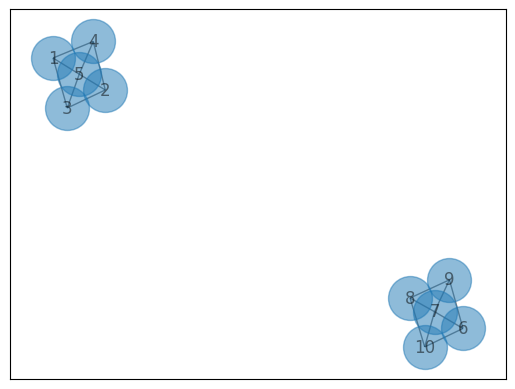

In [31]:
def find_max_edge(temp_betweenness):
    max_key = None
    max_betweenness = 0.0
    for edge in temp_betweenness.keys():
        if temp_betweenness[edge] > max_betweenness: 
            max_betweenness = temp_betweenness[edge]
            max_key = edge 
    ## Remove edge from dictionary  
    temp_betweenness.pop(max_key)
    return max_key        

def remove_edges(graph, k=2):
    '''Remove k edges from the graph'''
    temp_graph = graph.copy()
    for _ in range(k):
        ## Compute the betweenness for each graph created as edges are removed   
        temp_betweenness = nx.edge_betweenness_centrality(temp_graph)
        max_key = find_max_edge(temp_betweenness)
        temp_graph.remove_edge(max_key[0],max_key[1])
    return temp_graph    

partitioned_graph = remove_edges(simple_graph, k=2)

nx.draw_networkx(partitioned_graph, with_labels=True, alpha=0.5, node_size=1000)  

The partition of the simple graph into the two communities is exactly as expected. 

You will apply the betweenness-based graph partitioning to the karate club graph. But first, it will be useful to see the actual partitioning of the club members that resulted from the club splitting in a dispute. The club split into two communities, one centered around a key figure, Mr Hi, and the other around an officer of the club. To see this partition, execute the code in the cell below. 

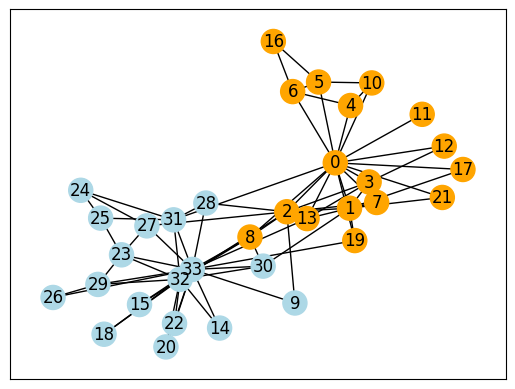

In [32]:
club_color = {
    'Mr. Hi': 'orange',
    'Officer': 'lightblue',
}
node_colors = [club_color[K_club._node[n]['club']] for n in K_club._node]
nx.draw_networkx(K_club, node_color=node_colors, with_labels=True)

Examine this result, keeping in mind that Mr Hi is represented by node 0 and the officer by node 33. 

> **Exercise 3-08:** To understand how the karate club graph can be partitioned using edge betweenness execute the code in the cell below. For each iteration of the for loop, the following operations are performed:   
> 1. Compute a partitioned graph for each number of edges to remove using the `remove_edges` function. 
> 2. Print the number of edges removed as a label of the resulting graph. 
> 3. Display the plot of the partitioned graph, using the show method to ensure each plot is displayed individually. 

Remove 9 edges


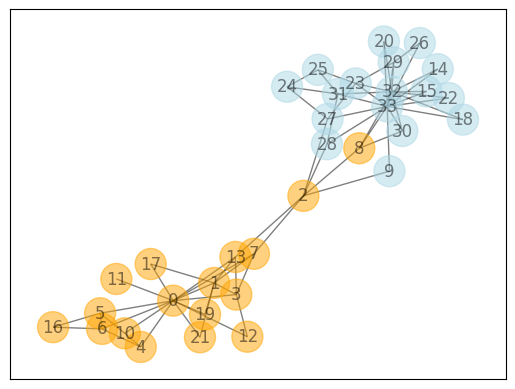

Remove 10 edges


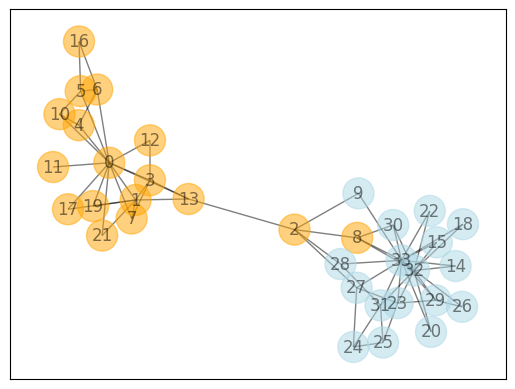

Remove 11 edges


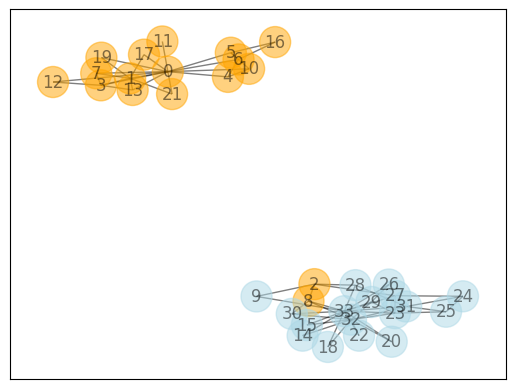

Remove 12 edges


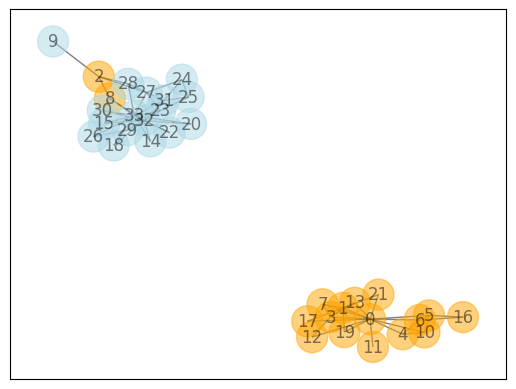

Remove 13 edges


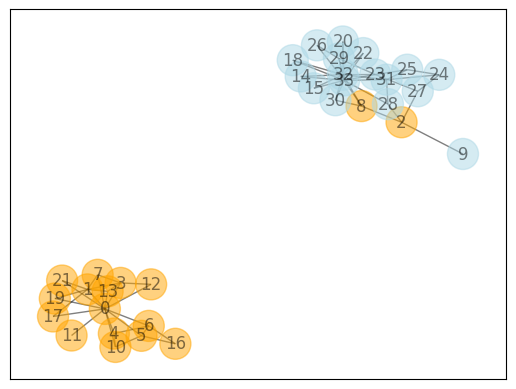

Remove 14 edges


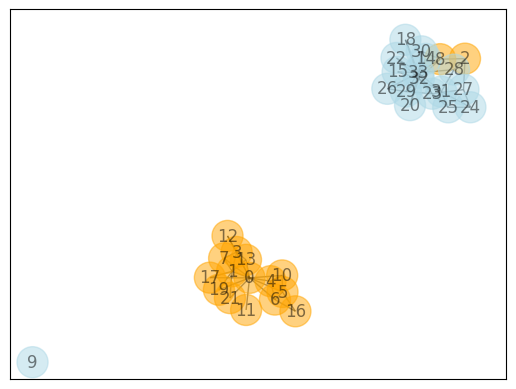

Remove 15 edges


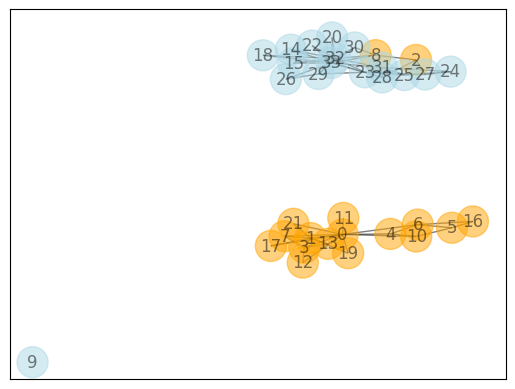

In [33]:
## Put your code below





> Examine these results and answer the following questions:  
> 1. How many edges must be removed to create a graph with two components, each representing a community?    
> 2. Are the members of these two communities found with the graph partitioned reasonably aligned with the actual split of the karate club?  
> 3. How many edges must be removed before the graph partition starts to produce isolated singletons?     
> **End of exercise.**

> **Answers:**     
> 1.           
> 2.            
> 3.         

## Modularity and Graph Partitioning   

Modularity of a graph measures the concentration of edges to certain nodes compared the number expected for a random graph. Since we expect communities to have a high concentration of edges, modularity can be used as a community detection metric.  

There are many proposals for algorithms one can use to partition a graph. In these exercises will we look at only one, greedy partitioning algorithm. The algorithm is conceptually simple, starting with a random allocation of nodes to two equal partitions of the graph. Nodes chosen at random one at a time are moved from one component to the other. In this process, the community assignment of the chosen node is changed to the other community. If the modularity of the graph improves the new assignment is retained. Otherwise the node retains its current assignment.  

To see this algorithm applied to the simple example graph execute the code in the cell below, which uses the [networkx.algorithms.community.modularity_max.greedy_modularity_communities](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html?highlight=greedy%20modularity#networkx.algorithms.community.modularity_max.greedy_modularity_communities) function. 

[frozenset({1, 2, 3, 4, 5}), frozenset({6, 7, 8, 9, 10})]


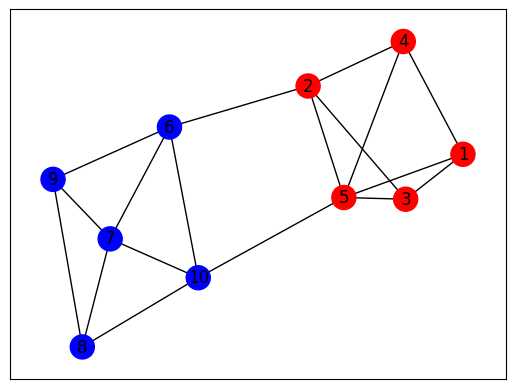

In [35]:
def assign_node_colors(G, communities, col, first_node_number=0):
    ## first unpack the list of frozen sets to a list of lists
    ## so we can actually work with the results 
    node_lists = []
    for i in range(len(communities)):
        node_lists.append([x for x in set(communities[i])])  
    
    ## Now, assign colors from the color dictionary  
    node_colors = [' ']*len(G.nodes)
    for i in range(len(communities)):
        for j in node_lists[i]:
            node_colors[j-first_node_number] = col[i]     
    return node_colors        

## Find the modular communities 
modular_communities = greedy_modularity_communities(simple_graph)
print(modular_communities)

## Get the color list for the nodes
node_colors = assign_node_colors(simple_graph, modular_communities, col, first_node_number=1)

## Finally draw the graph with the colors showing the communities 
nx.draw_networkx(simple_graph, node_color=node_colors)

The greedy modularity algorithm has found the expected two communities.   

> **Exercise 03-9:** Complete the code in the cell below to apply the greedy modularity algorithm to the partition of the karate club graph. Assign the partitioned graph to a variable named `club_modular_communities`. Print the `club_modular_communities`. Execute the code and examine the results. 

[frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 16, 19, 4, 5, 6, 10, 11})]
['blue', 'gray', 'gray', 'gray', 'blue', 'blue', 'blue', 'gray', 'red', 'gray', 'blue', 'blue', 'gray', 'gray', 'red', 'red', 'blue', 'gray', 'red', 'blue', 'red', 'gray', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']


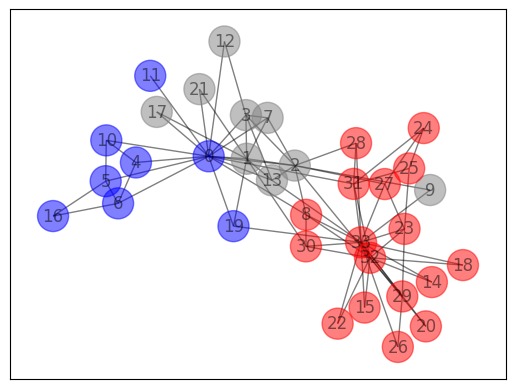

In [36]:
## Color dictionary for dispalying the graph
col = {0:'red',1:'gray',2:'blue'}

## Put your code below



## Set the node colors
node_colors = assign_node_colors(K_club, club_modular_communities, col)
print(node_colors)

## Finally draw the graph with the colors showing the communities 
nx.draw_networkx(K_club, with_labels=True, alpha=0.5, node_size=500, node_color=node_colors)

[frozenset({8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21}), frozenset({16, 4, 5, 6, 10})]
['gray', 'gray', 'gray', 'gray', 'blue', 'blue', 'blue', 'gray', 'red', 'red', 'blue', 'gray', 'gray', 'gray', 'red', 'red', 'blue', 'gray', 'red', 'gray', 'red', 'gray', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']


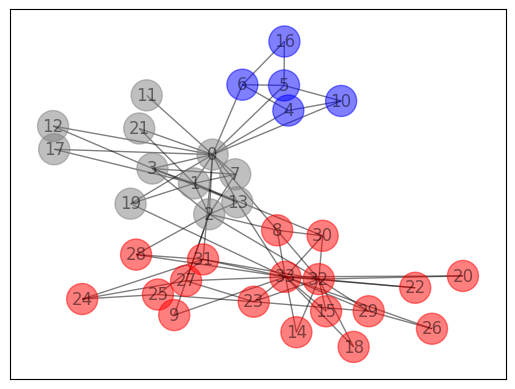

In [37]:
## Put your code below




## Set the node colors
node_colors = assign_node_colors(K_club, club_modular_communities, col)
print(node_colors)

## Finally draw the graph with the colors showing the communities 
nx.draw_networkx(K_club, with_labels=True, alpha=0.5, node_size=500, node_color=node_colors)

> Examine the results of partitioning both the weighted and unweighted graph and answer these questions.     
> 1. At first this partitionings seem odd. But, there might be an explanation. Do you see evidence that the third partition of either the unweighted or weighted graph might be club members with no particularly stronger connection to either of the factions that split the club? To answer this question, look back at the k-core for $k=4$ and the betweenness centrality plots you created in exercises 3-04 and 3-08.
> 2. Consider the differences between the edge betweenness of the unweighted and weighted graphs seen in Exercise 3-07. In one or a few sentences, explain the difference in the partitioning of the weighted and unweighted graphs in terms of the edge betweenness.       
> **End of exercise.**     

> **Answer:**    
> 1.          
> 2.      

 ## Small World Networks      

 [**Small world networks (SWN)**](https://en.wikipedia.org/wiki/Small-world_network) have low degree of separation between nodes 
Small world networks comprise two types of edges.   
1. Edges between near neighbors of a lattice network.     
2. A small number of edges between distant nodes.       

Key properties of SWNs include:
1. Relatively few highly connected nodes or hubs compared to random graphs.
2. The average distances between nodes, $L$, of a SWN grows following a **power law** as the number of nodes, $n$, grow.
   $$L \propto log\ n$$

There are several ways to measure the degree of "small worldness" one can use to compare a SWN to an equivalent random graph. Here, we will only use one, the small world coefficient, $\omega$:      
$$\omega = \frac{L}{L_r} - \frac{C}{C_l}$$   
where,    
- $0 \le \omega \le 1$, where larger values of $\omega$ indicate stronger small world properties.   
- $L_r$ is the average distances between nodes of an equivalent random graph.   
- $C$ is the clustering coefficient of the SWN.   
- $C_l$ is the clustering coefficient of the equivalent random lattice.     

For the examples we use the [networkx.navigable_small_world_graph]() function to generate the small work networks. The arguments for this function are:    
- $n^2$ is the number of nodes in the network.      
- $𝑝=1$ is the diameter of short-range connections.  
- $𝑞$ is the number of long-range connections per node.   

Execute the code in the cell below to generate and display SWNs.   

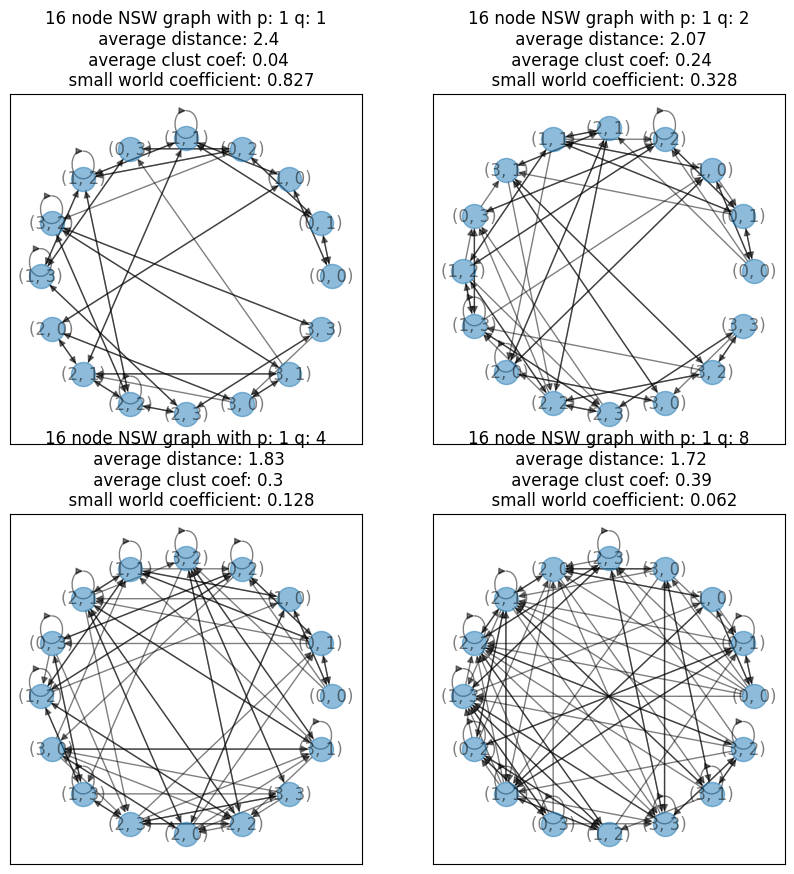

In [38]:
_,ax_p = plt.subplots(2,2, figsize =(10,10))
ax_p = ax_p.flatten()

n=4
p=1
np.random.seed(5674)
for ax, q in zip(ax_p, [1,2,4,8]): 
    NSW_graph = nx.navigable_small_world_graph(n=n, p=p, q=q)
    
    average_dist = round(nx.average_shortest_path_length(NSW_graph), 2)
    average_clust_coef = round(nx.average_clustering(NSW_graph), 2)
    SW_coefficient = round(nx.omega(nx.to_undirected(NSW_graph)), 3)

    nx.draw_networkx(NSW_graph, pos=nx.circular_layout(NSW_graph), alpha=0.5, ax=ax)
    ax.set_title(f"{n**2} node NSW graph with p: {p} q: {q}\n average distance: {average_dist}\n average clust coef: {average_clust_coef}\n  small world coefficient: {SW_coefficient}")

> **Exercise 3-10:** Examine these networks. As the number of long-range edges increases, how does the small world property of the network change?     

> **Answer:**         

In the foregoing example, we increased the number of long-range connections with a fixed diameter for the short range connections. Now, we will vary the diameter of the short range connections, keeping the number of long range connections constant. Execute the code in the cell below and examine the results. 

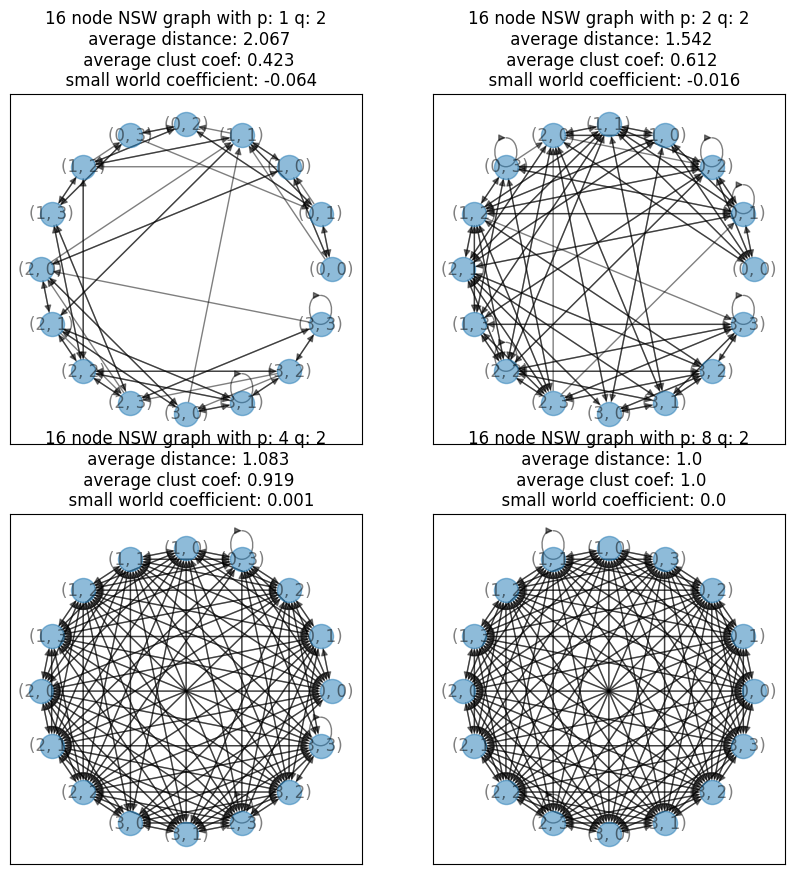

In [39]:
_,ax_p = plt.subplots(2,2, figsize =(10,10))
ax_p = ax_p.flatten()

n=4
q=2
np.random.seed(2398)
for ax, p in zip(ax_p, [1,2,4,8]): 
    NSW_graph = nx.navigable_small_world_graph(n=n, p=p, q=q)
    
    average_dist = round(nx.average_shortest_path_length(NSW_graph), 3)
    average_clust_coef = round(nx.average_clustering(NSW_graph), 3)
    SW_coefficient = round(nx.omega(nx.to_undirected(NSW_graph)), 3)

    nx.draw_networkx(NSW_graph, pos=nx.circular_layout(NSW_graph), alpha=0.5, ax=ax)
    ax.set_title(f"{n**2} node NSW graph with p: {p} q: {q}\n average distance: {average_dist}\n average clust coef: {average_clust_coef}\n  small world coefficient: {SW_coefficient}")

Finally, to illustrate the power law relationship between the average distances between nodes as the number of nodes increases, execute the code in the cell below and examine the results.  

Text(0.5, 0, 'Log number of nodes')

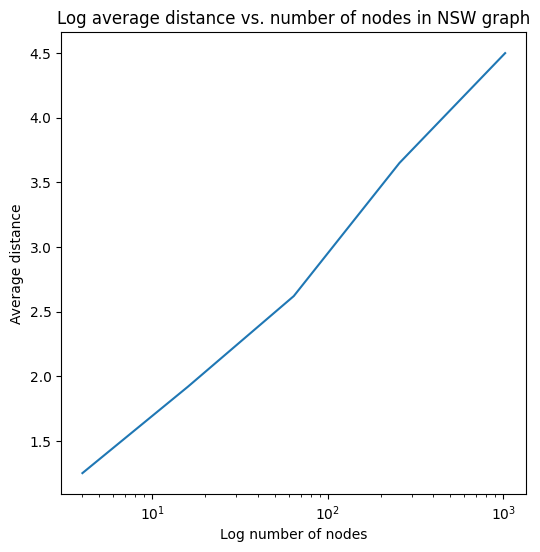

In [40]:
_,ax = plt.subplots(figsize =(6,6))
#ax_p = ax_p.flatten()

q=4
n_list = [2,4,8,16,32]
average_dist = []
for n in n_list: 
    NSW_graph = nx.navigable_small_world_graph(n=n, q=q)
    average_dist.append(round(nx.average_shortest_path_length(NSW_graph), 2))

n_list = np.square(n_list)
ax.plot(n_list, average_dist)
ax.set_xscale('log')
ax.set_title(f"Log average distance vs. number of nodes in NSW graph")
ax.set_ylabel('Average distance')
ax.set_xlabel('Log number of nodes')          

> **Exercise 3-11:** Notice that the network approaches fully connected as the diameter of the short-range connections increases. Examine these networks and answer the following questions:
> 1. How does $\omega$ change with increasing short-range diameter and why?
> 2. As the short-range diameter increases how do the clustering coefficient and average distance between nodes change and why?
> 3. In one or a few sentences, explain how the average distance plot show the expected power law behavior.   

> **Answers:**
> 1.       
> 2.        
> 3.     

#### Copyright 2021, 2022, 2023, 2025, Stephen F Elston. All rights reserved.